In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import copy
import scrna._config
from scrna.datasets import *

In [45]:
colors = {
    'gpower': 'C4',
    'sklearn': 'C1',
    'amanpg (0)': 'C3',
    'amanpg (10000)': 'C2',
    'fista (gram-schmidt)': 'C5',
    'fista (lowdin)': 'C0',
    'sklearn (whitening)': 'C6',
}

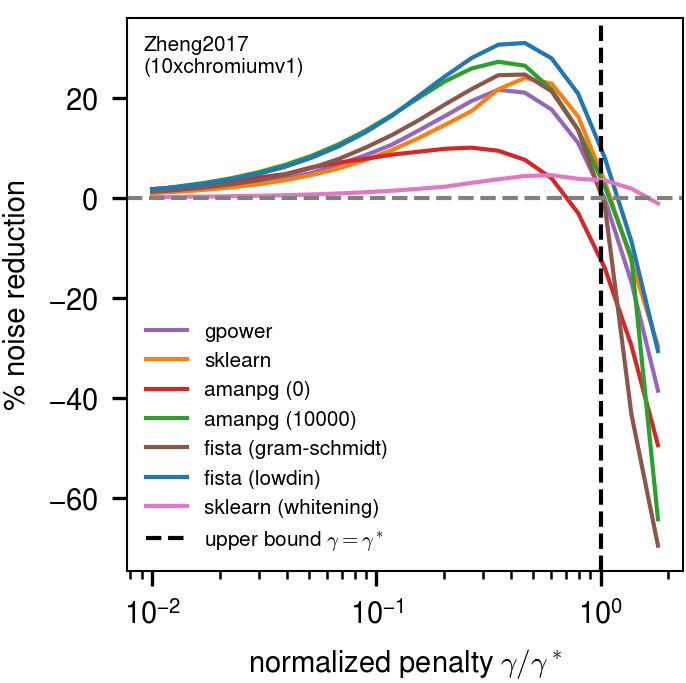

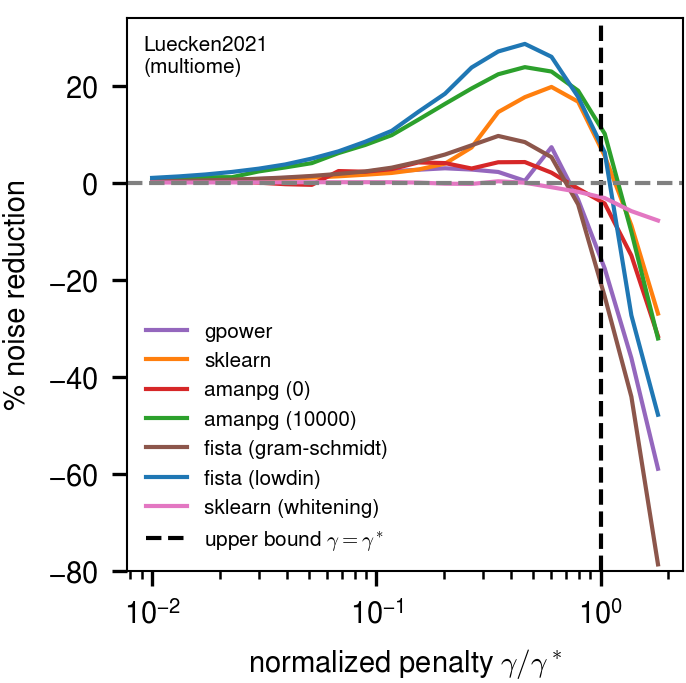

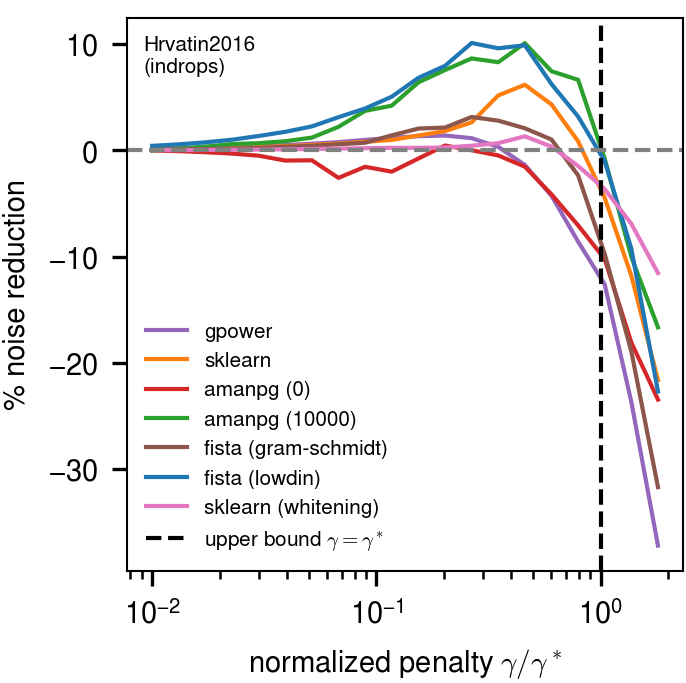

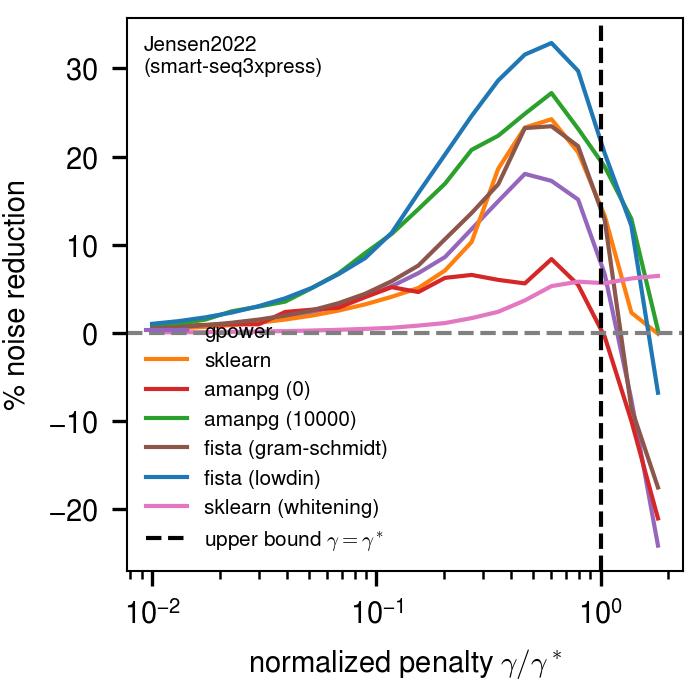

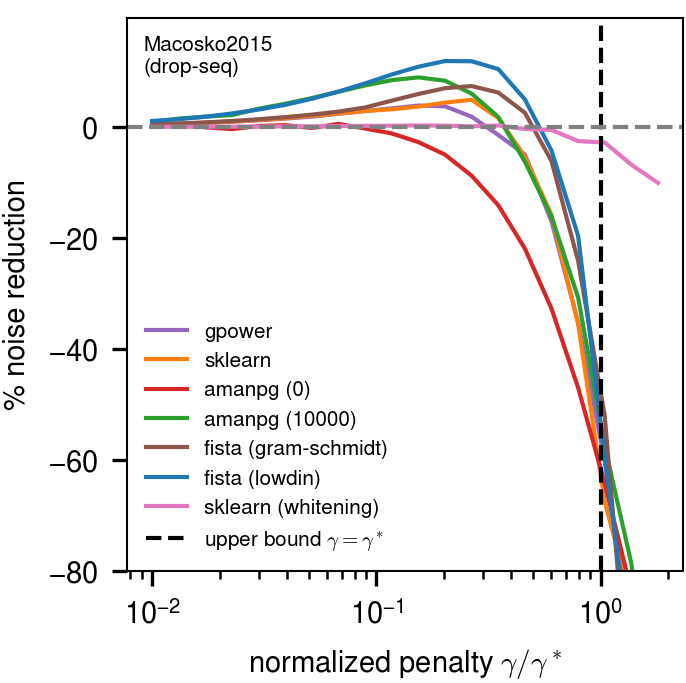

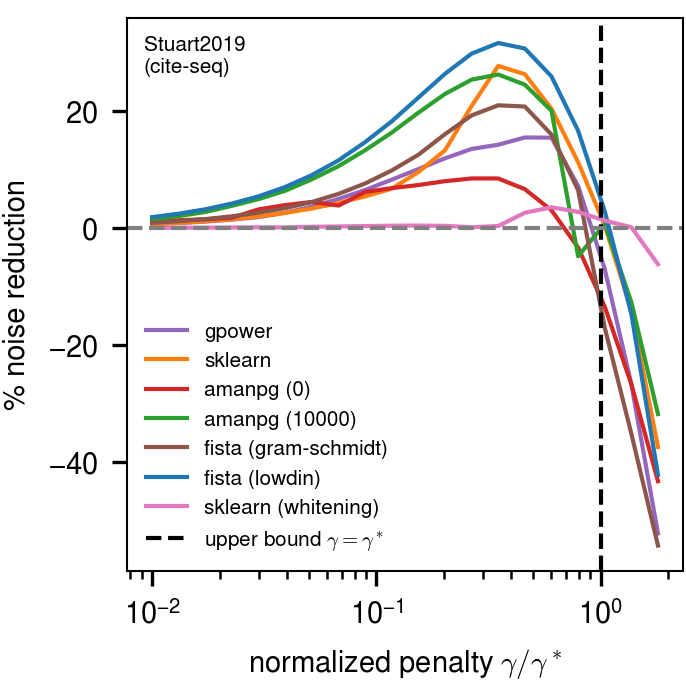

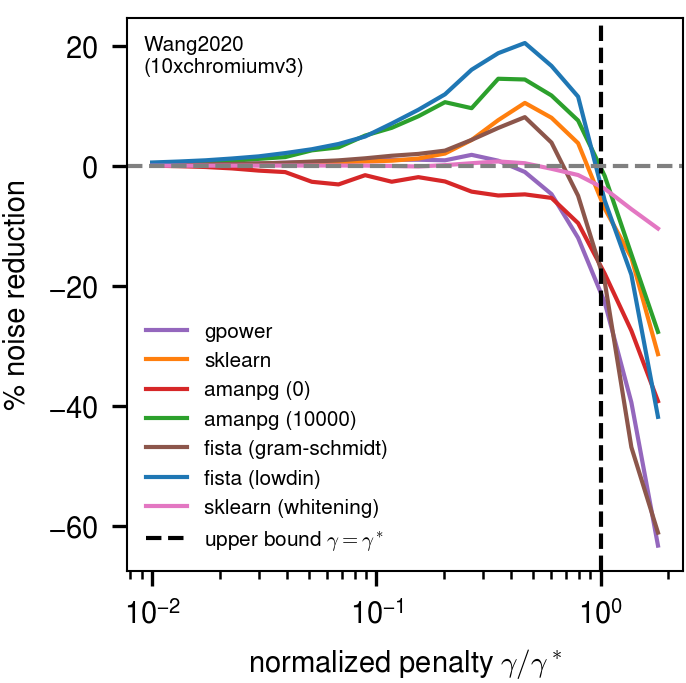

In [46]:
ngenes = 2000
flavor = 'seurat_v3'

obs = json.load(open('figures/scan_%s_%d_b.json' % (flavor, ngenes), 'r'))
facs = np.logspace(np.log10(0.01),np.log10(1.8), 20)
figsize = plt.rcParams['figure.figsize']
    
for name, _obs in obs.items():
    
    figsize = plt.rcParams['figure.figsize']
    xy=(0.2, 0.85)
    #if name not in ['Zheng2017\n(10xchromiumv1)', 'Macosko2015\n(drop-seq)'] and flavor :
        #figsize = (figsize[0]*3/4, figsize[0]*3/4)
        #xy = (0.27, 0.88)
        
    fig, ax = plt.subplots(figsize=figsize)

    for (_name, _data) in _obs.items():

        
        ax.plot(facs, -np.array(_data['data'])*100, '-', color = colors[_name], label=_name)

    ax.axvline(x = 1, color='k', linestyle='--', label=r'upper bound $\gamma = \gamma^*$')
    ax.axhline(y = 0,  linestyle='--', color='grey')
    ax.legend(frameon=False, loc='lower left', fontsize=5)
    ax.annotate(name, xy=xy, xycoords='figure fraction', fontsize = 5)
    lims = ax.get_ylim()
    ax.set_xscale('log')
    ax.set_ylim(ymin = max(-80, lims[0]))
    ax.set_xlabel(r'normalized penalty $\gamma/\gamma^*$')
    ax.set_ylabel(r'% noise reduction')

    fig.savefig('figures/scan/scan_%s_%d_%s.pdf' % (flavor, ngenes, name), dpi=300)

average improvement {'sklearn': 11.946850677078798, 'amanpg (10000)': 13.535977349600856, 'fista (lowdin)': 18.74421555336284}


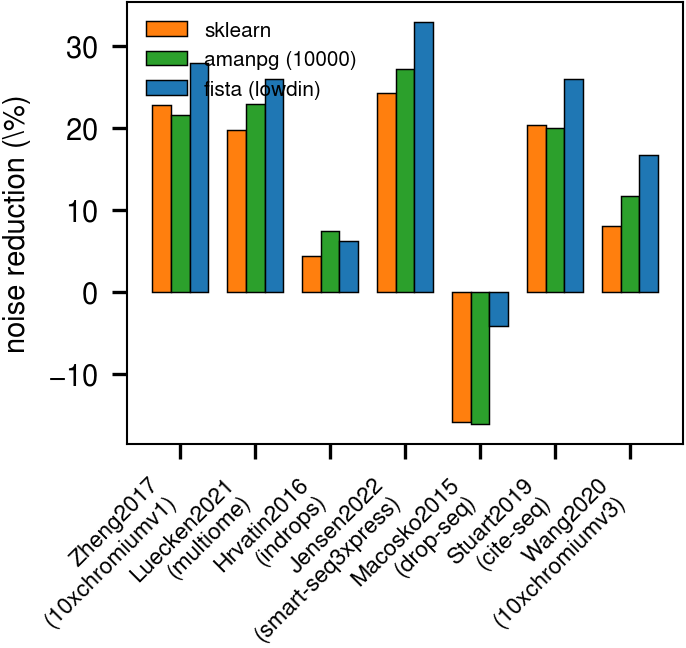

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

arg = np.argmin(np.abs(facs - 0.6))
data = obs
categories = list(data.keys())
methods = list(next(iter(data.values())).keys())

# Extract the value at index `arg` from each method's "data" array
values = {
    method: [
        -100*data[cat][method]['data'][arg] if 'data' in data[cat][method] else np.nan
        for cat in categories
    ]     
    for method in methods
    if method in ['amanpg (10000)', 'sklearn', 'fista (lowdin)']
}

methods = list(values.keys())

# Prepare the plot
x = np.arange(len(categories))  # label locations
width = 0.5 / (len(methods) - 1)  # adaptive width

figsize = plt.rcParams['figure.figsize']
fig, ax = plt.subplots(figsize=[figsize[0], 0.8 * figsize[1]])

for i, (method, val) in enumerate(values.items()):

    offset = (i - (len(methods) - 1) / 2) * width  # len(methods)-2 because one is skipped
    bar_positions = x + offset
    ax.bar(
        bar_positions,
        val,
        width=width,
        label=method,
        color=colors[method],
        edgecolor='black',
        linewidth=0.35
    )

means = {key: np.mean(val) for key, val in values.items()}
print('average improvement', means)
# Final formatting
ax.set_ylabel(r'noise reduction (\%)')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=5.5)
ax.tick_params(axis='y')
ax.legend(fontsize=5, loc='upper left', frameon=False)

fig.savefig('figures/scan/subspace_%.2f_%s.pdf' % (np.abs(facs)[arg], flavor), dpi=300)